# 1. Инициализация

## 1.1. Импорт библиотек

In [3]:
# Стандартный набор
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

# Метод главных компонент
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Пригодится
from sklearn.metrics import mean_absolute_error as MAE

## 1.2. Загрузка данных

In [4]:
df = pd.read_csv('mnist.csv')

In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

## 1.3. Просмотр данных

Можно так:

In [7]:
first_sample_values = X[0]

for i in range(28):
    for j in range(28):
        current_value = first_sample_values[28 * i + j]
        if current_value < 10:
            current_value = ' ' + str(current_value) + ' '
        elif current_value < 100:
            current_value = ' ' + str(current_value)
        else:
            current_value = str(current_value)
        print(current_value, end=' ')
    print('\n')

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   38  43 105 255 253 253 253 253 253 174  6   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   43 139 224 226 252 253 252 252 252 252 252 252 158  14  0   0   0   0   0  

 0   0   0   0   0   0   0   0   0  178 252 252 252 252 253 252 252 252 252 252 252 252  59  0   0   0   0   0  

 0   0   0   0   0   0   0   0   0  109 252 252 230 132 133 132 132 189 252 252 252 252 

Можно и так:

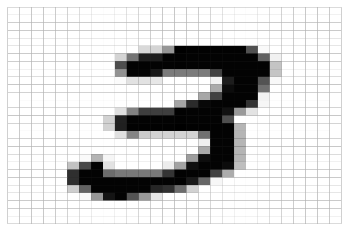

In [8]:
sns.heatmap(
    first_sample_values.reshape(28, 28),
    cmap='binary',
    xticklabels=False,
    yticklabels=False,
    cbar=False
)
plt.show()

А можно так:

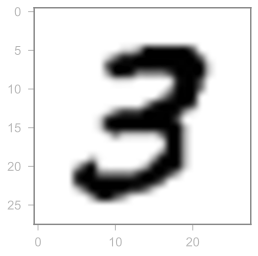

In [9]:
plt.imshow(
    first_sample_values.reshape(28, 28),
    cmap='binary',
     interpolation='mitchell'
)
plt.show()

# 2. Метод главных компонент

## 2.1. Преобразование

Сначала стандартизация:

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Сам МГК:

In [11]:
pca = PCA()
# PCA(n_components=2)
# PCA(n_components=0.95)
PC = pca.fit_transform(X_scaled)

По умолчанию на выходе - матрица такой же размерности:

In [12]:
X.shape

(6000, 784)

In [13]:
PC.shape

(6000, 784)

Визуализация:

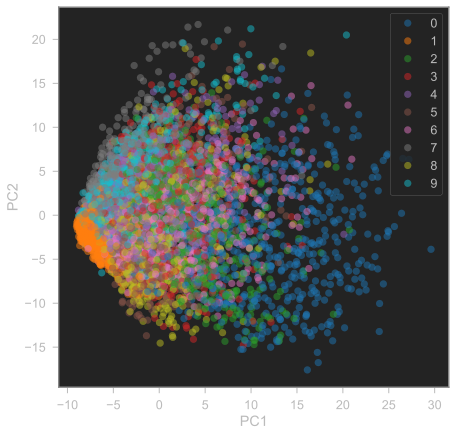

In [14]:
fig, ax = plt.subplots(figsize=[7, 7])
plot = ax.scatter(PC[:, 0], PC[:, 1], c=y, alpha=0.5, cmap='tab10')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(*plot.legend_elements())
plt.show()

## 2.2. Проверка математики

Первая главная компонента:

In [15]:
pc1 = PC[:, 0]
pc1

array([2.28669382, 4.20434375, 5.84900865, ..., 9.80322269, 3.08228973,
       2.41275141])

Собственные значения и собственные векторы:

In [16]:
eig_val, eig_vec = np.linalg.eig(np.cov(X_scaled.T))

Проверим дисперсию:

In [17]:
np.var(pc1) # Дисперсия посчитана по готовому столбцу

40.936379191289774

In [18]:
eig_val[0] # Посчитанное первое собственное значение ковариационной матрицы

40.94320305846628

In [19]:
pca.explained_variance_[0] # Дисперсия из коробки

40.94320305846626

Проверим сам столбец:

In [20]:
MAE(
    eig_vec[:, 0], # Посчитанный первый собственный вектор
    pca.components_[0] # Главная компонента из коробки
)

8.972127792508233e-17

In [21]:
eig_vec[:, 0] @ X_scaled.T

array([2.28669382, 4.20434375, 5.84900865, ..., 9.80322269, 3.08228973,
       2.41275141])

In [22]:
MAE(
    eig_vec[:, 0] @ X_scaled.T,
    pc1
)

1.8474420832113175e-14

## 2.3. Анализ

Выбрать компоненты с дисперсией, большей 1:

In [23]:
n1 = (pca.explained_variance_ > 1).sum()
n1

136

In [24]:
(pca.explained_variance_ratio_[:n1]).sum()

0.8406706394320413

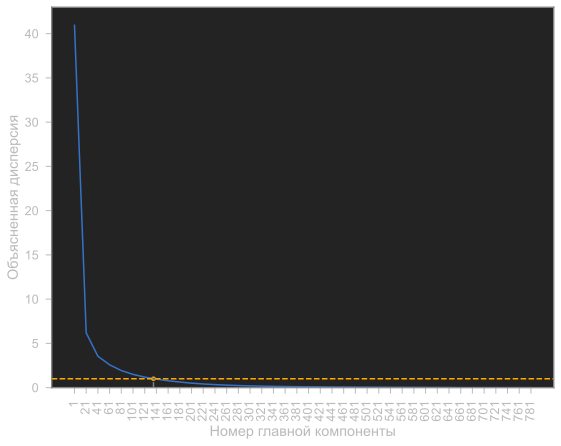

In [25]:
x_ticks = np.arange(1, PC.shape[1], step=20)
y_values = pca.explained_variance_[x_ticks - 1]

fig, ax = plt.subplots(figsize=[9, 7])

plt.plot(x_ticks, y_values)

plt.xlabel('Номер главной компоненты')
plt.ylabel('Объясненная дисперсия')
plt.xticks(x_ticks)
plt.xticks(rotation=90)
plt.ylim(0.0)

plt.axhline(y=1, color='orange', linestyle='--')
plt.plot([n1, n1], [0, 1], color='gray', linestyle='--')
plt.scatter(n1, 1, s=20, color='orange')

plt.show()

Выбрать компоненты, объясняющие определенную долю общей дисперсии:

In [26]:
cum_var = pca.explained_variance_ratio_.cumsum()
n2 = (cum_var <= 0.95).sum()
n2

268

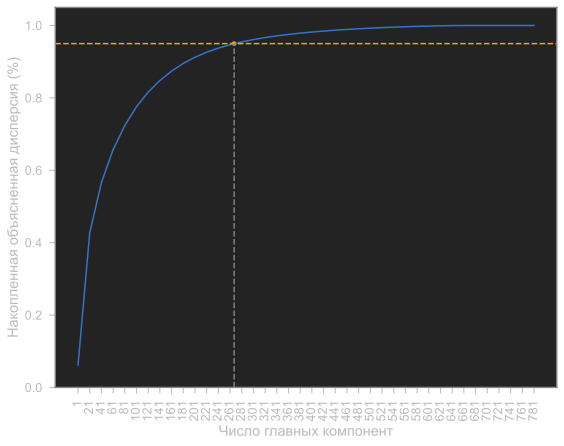

In [27]:
x_ticks = np.arange(1, PC.shape[1], step=20)
y_values = cum_var[x_ticks - 1]

fig, ax = plt.subplots(figsize=[9, 7])

plt.plot(x_ticks, y_values)

plt.xlabel('Число главных компонент')
plt.ylabel('Накопленная объясненная дисперсия (%)')
plt.xticks(x_ticks)
plt.xticks(rotation=90)
plt.ylim(0.0, 1.05)

plt.axhline(y=0.95, color='orange', linestyle='--')
plt.plot([n2, n2], [0, 0.95], color='gray', linestyle='--')
plt.scatter(n2, 0.95, s=20, color='orange')

plt.show()